<a href="https://colab.research.google.com/github/badlogic/genai-workshop/blob/main/01_supervised_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We use Pytorch for the actual supervised learning part, and scikit-learn to generate our training and test sets.

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
from torch.optim import SGD
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt

Generate a random 2D dataset with 2 classes, and split it into training and validation set.

In [2]:
# Generate a 2D dataset that is (mostly) linearly separable.
X, y = make_blobs(n_samples=100, centers=2, n_features=2, cluster_std=1.0, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

Plot the dataset

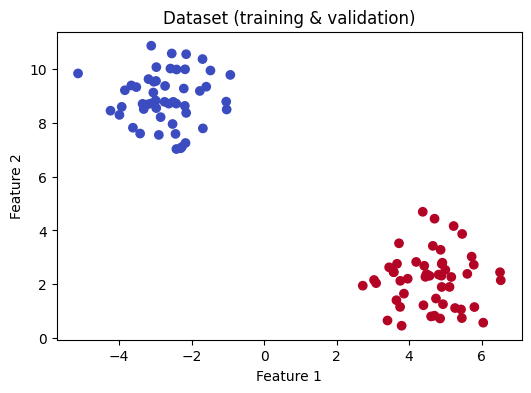

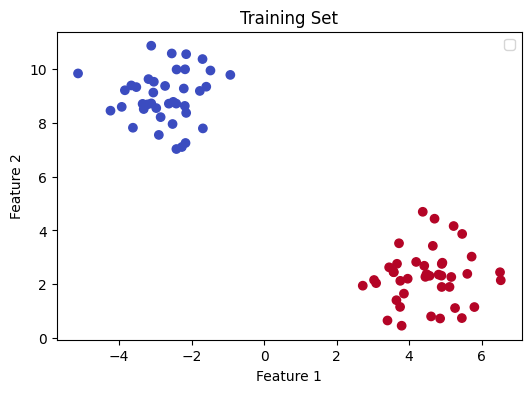

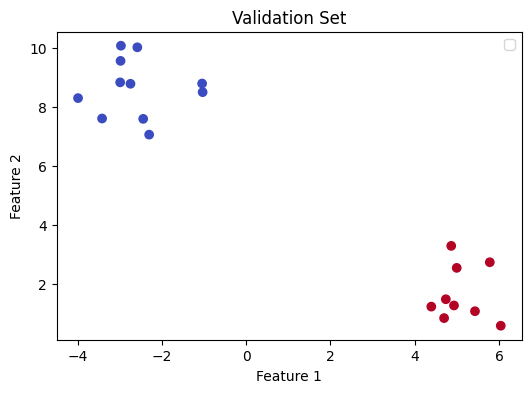

In [3]:
# Plot the full dataset
plt.figure(figsize=(6, 4))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm')
plt.title('Dataset (training & validation)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Plot the training set
plt.figure(figsize=(6, 4))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='coolwarm')
plt.title('Training Set')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

# Plot the validation set
plt.figure(figsize=(6, 4))
plt.scatter(X_val[:, 0], X_val[:, 1], c=y_val, cmap='coolwarm')
plt.title('Validation Set')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

Convert the dataset to Pytorch tensors and create dataloaders for them.



In [4]:
# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_val_tensor = torch.tensor(X_val, dtype=torch.float)
y_val_tensor = torch.tensor(y_val, dtype=torch.long)

# Create dataloaders
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
train_loader = DataLoader(train_dataset, batch_size=10, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=10, shuffle=False)

Define a simple linear neural network layer, an optimizer, and a loss function used for training.

Set up the training loop. For each epoch (number of times we show the full training set to the network), go through the training set one batch at a time (`batch_size=10`).

For each batch
* Reset the gradients in the optimizer
* Get a prediction for each training sample
* Calculate the loss by comparing the predicted labels with the actual labels
* Perform back propagation to calculate new gradients
* Use the gradients to update the weights and bias in the neural network layer

We also keep track of the average training loss for each epoch, and print it at the end of the epoch. This way we can see if the model improves (training loss should get smaller)



In [5]:
# Initialize the linear layer
linear_layer = nn.Linear(2, 2)  # 2 input features, 2 output classes
optimizer = SGD(linear_layer.parameters(), lr=0.01)
criterion = nn.CrossEntropyLoss()

# Training loop with loss accumulation and averaging
# Increase the number of epochs to see if it has
# a positive or negative effect on the training loss
num_epochs = 50
for epoch in range(num_epochs):
    total_loss = 0.0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = linear_layer(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    average_loss = total_loss / len(train_loader)
    print(f'Epoch {epoch+1}, Average Training Loss: {average_loss:.4f}')

Epoch 1, Average Training Loss: 0.8281
Epoch 2, Average Training Loss: 0.3785
Epoch 3, Average Training Loss: 0.2233
Epoch 4, Average Training Loss: 0.1550
Epoch 5, Average Training Loss: 0.1184
Epoch 6, Average Training Loss: 0.0956
Epoch 7, Average Training Loss: 0.0802
Epoch 8, Average Training Loss: 0.0690
Epoch 9, Average Training Loss: 0.0606
Epoch 10, Average Training Loss: 0.0540
Epoch 11, Average Training Loss: 0.0488
Epoch 12, Average Training Loss: 0.0445
Epoch 13, Average Training Loss: 0.0409
Epoch 14, Average Training Loss: 0.0379
Epoch 15, Average Training Loss: 0.0353
Epoch 16, Average Training Loss: 0.0330
Epoch 17, Average Training Loss: 0.0310
Epoch 18, Average Training Loss: 0.0292
Epoch 19, Average Training Loss: 0.0277
Epoch 20, Average Training Loss: 0.0263
Epoch 21, Average Training Loss: 0.0250
Epoch 22, Average Training Loss: 0.0239
Epoch 23, Average Training Loss: 0.0228
Epoch 24, Average Training Loss: 0.0219
Epoch 25, Average Training Loss: 0.0210
Epoch 26,

Now we can test the model by asking it to classify samples from the validation set it has not yet seen previously. We count the number of correctly classified samples and divide that number by the total number of samples. This gives us the accuracy of the model on the validation set.

In [6]:
# Evaluation on validation set
linear_layer.eval()  # Set the model to evaluation mode
with torch.no_grad():
    inputs = X_val_tensor
    labels = y_val_tensor
    outputs = linear_layer(inputs)
    _, predicted = torch.max(outputs, 1)
    total = labels.size(0)
    correct = (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f'Accuracy on the validation set: {accuracy}%')

Accuracy on the validation set: 100.0%


Let's visualize what the model learned, and why it's not 100% accurate. Since this is a single layer linear neural network, we can easily interpret its weights and bias as a 2D line, also known as the decision boundary.

When the model makes a prediction for a sample, it essentially checks if the point is above or below the line, and assigns the corresponding class for the respective side.

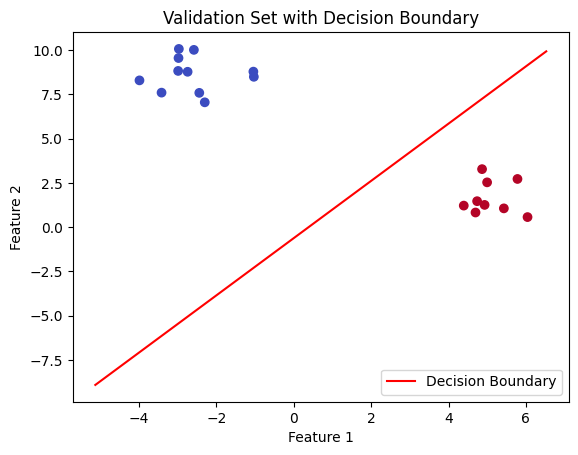

In [7]:
# Plot the validation set and the model's decision boundary
plt.scatter(X_val[:, 0], X_val[:, 1], c=y_val, cmap='coolwarm')

# Calculate the decision boundary
weights = linear_layer.weight.data.numpy()
bias = linear_layer.bias.data.numpy()
x_boundary = np.array([X[:,0].min(), X[:,0].max()])
y_boundary = -(bias[0] + weights[0][0]*x_boundary) / weights[0][1]

plt.plot(x_boundary, y_boundary, '-r', label='Decision Boundary')
plt.title('Validation Set with Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

What happens if our training data doesn't fully represent our real-world data? Let's find out by generating artificial additional data that is supposed to belong to one of the clases.

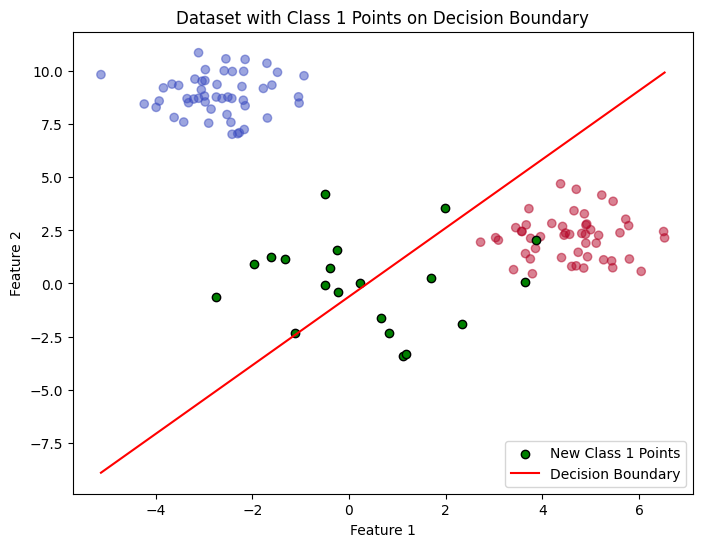

In [10]:
# Find a point on the decision boundary
x_center = x_boundary.mean()
y_center = -(bias[0] + weights[0][0]*x_center) / weights[0][1]

# Generate additional data points centered around this point
X_new, y_new = make_blobs(n_samples=20, centers=np.array([[x_center, y_center]]), cluster_std=2, n_features=2, random_state=42)
y_new = np.ones(len(X_new))  # Label these new points as class 1

# Plot the original data
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', alpha=0.5)

# Plot the new data points in green
plt.scatter(X_new[:, 0], X_new[:, 1], color='green', label='New Class 1 Points', edgecolor='k')

# Plot the decision boundary
plt.plot(x_boundary, y_boundary, '-r', label='Decision Boundary')

plt.title('Dataset with Class 1 Points on Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()